In [93]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import random

In [94]:
def calculate_angle(a, b, c):
    """Calculate the angle between three points."""
    a = np.array(a)  # Point A
    b = np.array(b)  # Point B (vertex of the angle)
    c = np.array(c)  # Point C

    ba = a - b  # Vector from B to A
    bc = c - b  # Vector from B to C

    # Calculate the cosine of the angle
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    #angle = np.arccos(cos_angle)  # Angle in radians
    return (cos_angle)


In [95]:
def calculate_distance(a,b):
    """Calculate the distane between 2 points."""
    a=np.array(a)
    b=np.array(b)
    
    dist=np.linalg.norm(a-b)
    return dist

In [ ]:
import mediapipe as mp

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Initialize lists to store data
asanas_name = []
angles_data = []
dist_data = []
labels = []

dataset_path = "D:\DESK\IITK\sem3\EE604\Main_Dataset"

# Extract angles for each image
i = 0
images = 0
for directory in os.listdir(dataset_path):
    dir_path = os.path.join(dataset_path, directory)
    if os.path.isdir(dir_path):
        internal = 0
        labels1 = []
        angles_data1 = []
        dist_data1 = []
        for img_file in os.listdir(dir_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(dir_path, img_file)

                # Load image and process with MediaPipe
                try:
                    image = cv2.imread(img_path)
                    if image is None:
                        # print(f"Failed to load image: {img_file}")
                        continue
                    
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    results = pose.process(image_rgb)

                    # Only proceed if landmarks are detected
                    if results.pose_landmarks:
                        landmarks = results.pose_landmarks.landmark

                        # Define points
                        A11 = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].z]
                        A12 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].z]
                        A13 = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].z]
                        A14 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].y, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].z]
                        A15 = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y, landmarks[mp_pose.PoseLandmark.LEFT_WRIST].z]
                        A16 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].y, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].z]
                        A17 = [landmarks[mp_pose.PoseLandmark.LEFT_PINKY].x, landmarks[mp_pose.PoseLandmark.LEFT_PINKY].y,  landmarks[mp_pose.PoseLandmark.LEFT_PINKY].z]
                        A18 = [landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].x, landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].y, landmarks[mp_pose.PoseLandmark.RIGHT_PINKY].z]
                        A19 = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX].y, landmarks[mp_pose.PoseLandmark.LEFT_INDEX].z]
                        A20 = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX].y, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX].z]
                        A21 = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB].x, landmarks[mp_pose.PoseLandmark.LEFT_THUMB].y, landmarks[mp_pose.PoseLandmark.LEFT_THUMB].z]
                        A22 = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB].x, landmarks[mp_pose.PoseLandmark.RIGHT_THUMB].y, landmarks[mp_pose.PoseLandmark.RIGHT_THUMB].z]
                        A23 = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y, landmarks[mp_pose.PoseLandmark.LEFT_HIP].z]
                        A24 = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].z]
                        A25 = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y, landmarks[mp_pose.PoseLandmark.LEFT_KNEE].z]
                        A26 = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].y, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].z]
                        A27 = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].z]
                        A28 = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].y, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].z]
                        A29 = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL].x, landmarks[mp_pose.PoseLandmark.LEFT_HEEL].y, landmarks[mp_pose.PoseLandmark.LEFT_HEEL].z]
                        A30 = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL].x, landmarks[mp_pose.PoseLandmark.RIGHT_HEEL].y, landmarks[mp_pose.PoseLandmark.RIGHT_HEEL].z]
                        A31 = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x, landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y, landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].z]
                        A32 = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x, landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y, landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z]

                        # Calculate angles
                        angles = [
                            # Centre at A12
                            calculate_angle(A14, A12, A24),
                            #calculate_angle(A11, A12, A24),
                            calculate_angle(A14, A12, A11),
                            
                            # Centre at A11
                            calculate_angle(A13, A11, A23),
                            #calculate_angle(A12, A11, A23),
                            calculate_angle(A12, A11, A13),
                            
                            # Centre at A14
                            calculate_angle(A16, A14, A12),
                            
                            # Centre at A13
                            calculate_angle(A15, A13, A11),
                            
                            # Centre at A24
                            #calculate_angle(A12, A24, A23),
                            #calculate_angle(A23, A24, A26),
                            calculate_angle(A12, A24, A26),
                            
                            # Centre at A23
                            calculate_angle(A11, A23, A25),
                            #calculate_angle(A11, A23, A24),
                            #calculate_angle(A24, A23, A25),
                            
                            # Centre at A26
                            calculate_angle(A28, A26, A24),
                            
                            # Centre at A25
                            calculate_angle(A23, A25, A27),
                            
                            # Centre at A28
                            #calculate_angle(A30, A28, A26),
                            calculate_angle(A32, A28, A26),
                            #calculate_angle(A32, A28, A30),
                            
                            # Centre at A27
                            #calculate_angle(A31, A27, A29),
                            #calculate_angle(A25, A27, A29),
                            calculate_angle(A31, A27, A25),
                            
                            # Centre at A31
                            #calculate_angle(A29, A31, A27),
                            
                            # Centre at A29
                            #calculate_angle(A27, A29, A31),
                            
                            # Centre at A30
                            #calculate_angle(A28, A30, A32),
                            
                            # Centre at A32
                            #calculate_angle(A28, A32, A30),
                            
                            # Centre at A18
                            #calculate_angle(A20, A18, A16),
                            
                            # Centre at A20
                            #calculate_angle(A18, A20, A16),
                            
                            # Centre at A19
                            #calculate_angle(A15, A19, A17),
                            
                            # Centre at A17
                            #calculate_angle(A15, A17, A19),
                            
                            # Centre at A16
                            #calculate_angle(A22, A16, A14),
                            #calculate_angle(A22, A16, A20),
                            calculate_angle(A22, A16, A18),
                            # calculate_angle(A14, A16, A18),
                            # calculate_angle(A14, A16, A20),
                            # calculate_angle(A20, A16, A18),
                            
                            # Centre at A15
                            #calculate_angle(A21, A15, A13),
                            calculate_angle(A21, A15, A17),
                            # calculate_angle(A21, A15, A19),
                            # calculate_angle(A13, A15, A19),
                            # calculate_angle(A13, A15, A17),
                            # calculate_angle(A19, A15, A17)
                        # ]

                        # dist_data1 = [
                            calculate_distance(A16,A15),
                            calculate_distance(A27,A28),
                            calculate_distance(A16,A28),
                            calculate_distance(A27,A15),
                            calculate_distance(A16,A27),
                            calculate_distance(A28,A15),
                            calculate_distance(A12,A26),
                            calculate_distance(A11,A25),
                            calculate_distance(A11,A16),
                            calculate_distance(A12,A15)
                        ]
                        

                        angles_data1.append(angles)
                        #angles_data.append(distex)
                        labels1.append(i)

                        internal += 1
                        # print(f"Landmarks detected for {img_file}")
                    else:
                        # print(f"Landmarks not detected for {img_file}")
                        continue
                except Exception as e:
                    print(f"Error processing {img_file}: {e}")
                    continue
        
        if(internal > 99):
            for items in labels1:
                labels.append(items)
            for items in angles_data1:
                angles_data.append(items)
            asanas_name.append(directory)
            i += 1
            images += internal
images

13593

In [119]:
13593 / len(asanas_name)

205.95454545454547

In [124]:
# Convert data to numpy arrays
X_data = np.array(angles_data)
Y_data = to_categorical(labels, num_classes=len(asanas_name)+1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# Split data
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=101)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_data.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(asanas_name)+1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=60, validation_data=(X_val, Y_val))

# Save the model
model.save('pose_classification_model.h5')

Epoch 1/60


d:\demonic head\stuff\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2176 - loss: 3.3730 - val_accuracy: 0.5388 - val_loss: 1.9152
Epoch 2/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4906 - loss: 1.9726 - val_accuracy: 0.5984 - val_loss: 1.6122
Epoch 3/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5512 - loss: 1.7319 - val_accuracy: 0.6388 - val_loss: 1.4838
Epoch 4/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5745 - loss: 1.6028 - val_accuracy: 0.6352 - val_loss: 1.4326
Epoch 5/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5918 - loss: 1.5184 - val_accuracy: 0.6535 - val_loss: 1.3831
Epoch 6/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6241 - loss: 1.4152 - val_accuracy: 0.6631 - val_loss: 1.3448
Epoch 7/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6361 - loss: 1.3609 - val_accuracy: 0.6642 - val_loss: 1.3216
Epoch 8/60
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6294 - loss: 1.3624 - val_accuracy: 0.6712 - val_

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 1.3309
Validation Loss: 1.3109670877456665
Validation Accuracy: 71.24%
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 71.24%
Classification Report:


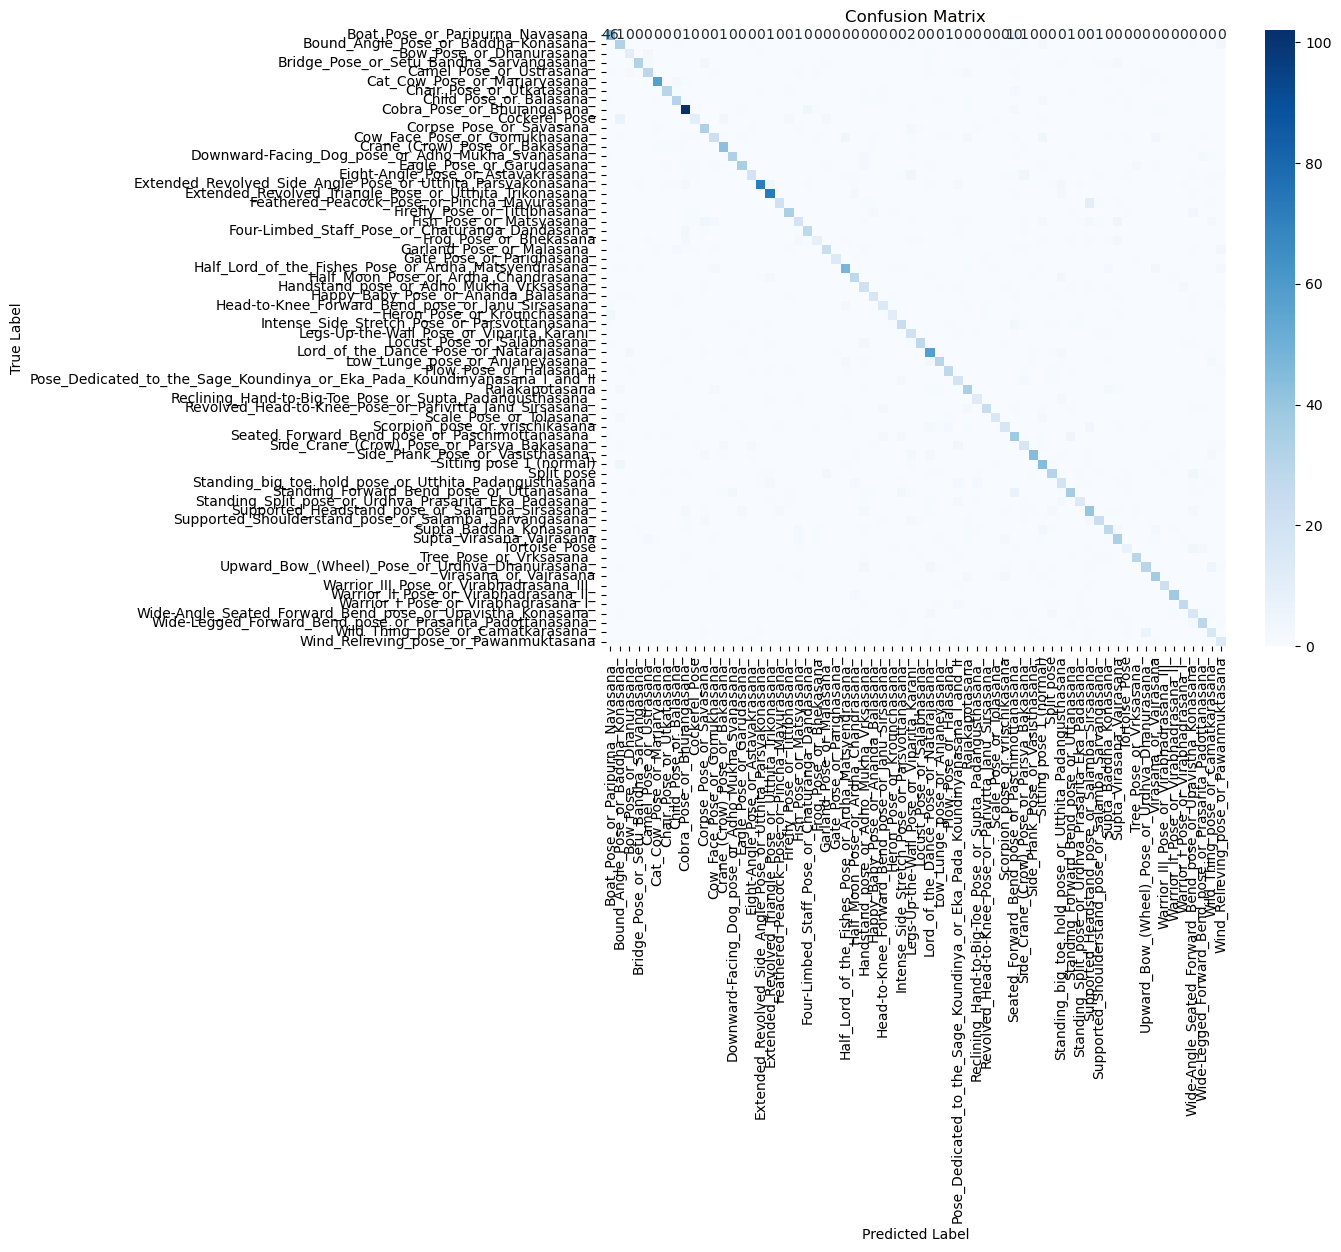

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on validation set (test data)
val_loss, val_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Predict on the validation data
Y_pred = model.predict(X_val)

# Convert predictions and true labels from one-hot encoding to labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_true_labels, Y_pred_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print("Classification Report:")
# print(classification_report(Y_true_labels, Y_pred_labels, target_names=asanas_name))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=asanas_name, yticklabels=asanas_name)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
